# Titanic Dataset

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Load dataset
df=pd.read_csv(r"C:\Users\91992\Python Projects\Titanic_ML\train.csv") # r=raw strings. to use safely backslashes(\\) instead of raplcing backslaahes (\\) to forward slashes(//).
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Handling Missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

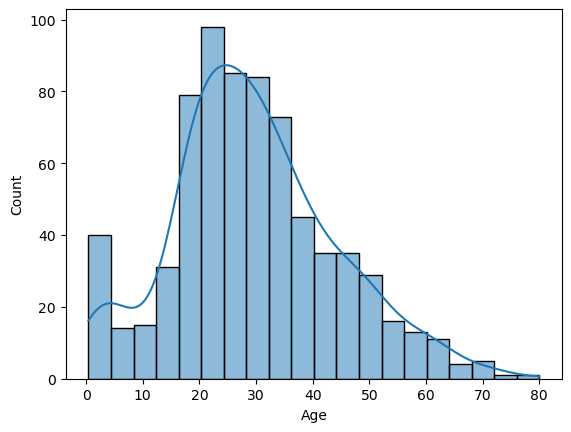

In [6]:
sns.histplot(df['Age'], kde=True) #kde=Kernel Density Estimate

<Axes: xlabel='Age', ylabel='Density'>

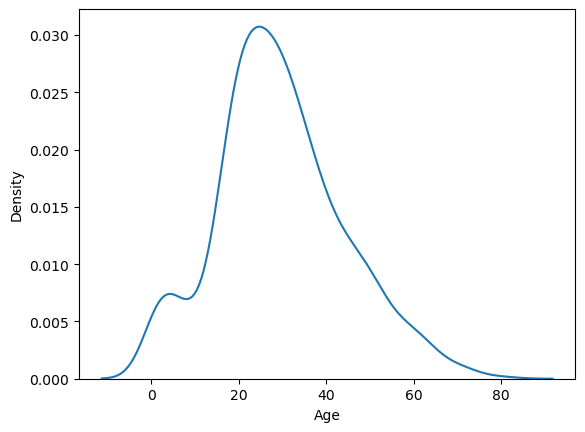

In [7]:
sns.kdeplot(df['Age'])

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [9]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

In [10]:
df.drop('Cabin', axis=1, inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Grouping

In [12]:
# Survival rate by Gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

74% of females survived vs only 18% of males

In [13]:
#Survival rate by Passanger Class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [14]:
#Combined Survival rate Gender + Passanger class
df.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [15]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [16]:
df.groupby(['Embarked', 'Pclass'])['Survived'].mean()

Embarked  Pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.589147
          2         0.463415
          3         0.189802
Name: Survived, dtype: float64

In [17]:
#Average fare by class & gender
df.groupby(['Pclass','Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

In [18]:
#Sorting
df.sort_values(by='Age', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q


In [19]:
#Filtering
df[df['Pclass']==1].groupby('Sex')['Survived'].mean()

Sex
female    0.968085
male      0.368852
Name: Survived, dtype: float64

In [20]:
df[df['Pclass']==2].groupby('Sex')['Survived'].mean()

Sex
female    0.921053
male      0.157407
Name: Survived, dtype: float64

In [21]:
df[df['Pclass']==3].groupby('Sex')['Survived'].mean()

Sex
female    0.500000
male      0.135447
Name: Survived, dtype: float64

In [22]:
#Save cleaned csv file
df.to_csv('titanic_cleaned.csv', index=False)